<a href="https://colab.research.google.com/github/pratikshab2805/rock-paper-scissors-ml/blob/main/Rock_Paper_ScissorsfinalML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# @title
from google.colab import drive
drive.mount('/content/drive')

import os

# Check if model was saved
model_path = '/content/drive/MyDrive/rps_model.h5'
if os.path.exists(model_path):
    print(" Model was saved! Training completed before disconnect.")
else:
    print(" Model not found. Training might have stopped.")

# List what's in your folder
drive_contents = os.listdir('/content/drive/MyDrive')
print("\nDrive contents:", drive_contents)

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [ ]:
DATASET_PATH = DATASET_PATH = '/content/drive/MyDrive/rps-datset--'
print("Dataset contents:")
print(os.listdir(DATASET_PATH))


In [ ]:
IMG_HEIGHT = 128
IMG_WIDTH = 128
BATCH_SIZE = 16


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2,
    validation_split=0.2
)


In [ ]:
import zipfile
import os


zip_path = '/content/drive/MyDrive/rps-datset--/RockPaperScissors.zip'
extract_path = '/content/drive/MyDrive/rps-datset--'


if not os.path.exists('/content/drive/MyDrive'):
    print("Error: Google Drive is disconnected. Please re-run the drive mount cell (the first cell in the notebook).")
else:
    print("Extracting ZIP file...")
    try:
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(extract_path)
        print("Extraction complete!")


        print("\nFolder contents after extraction:")
        contents = os.listdir(extract_path)
        print(contents)


        for item in contents:
            full_path = os.path.join(extract_path, item)
            if os.path.isdir(full_path):
                num_images = len(os.listdir(full_path))
                print(f"  {item}/: {num_images} images")

    except OSError as e:
        if "Transport endpoint is not connected" in str(e):
            print("\n❌ Error: The connection to Google Drive was lost during extraction.")
            print("၀ဠ FIX: Go to the top of the notebook, re-run 'drive.mount', then run this cell again.")
        else:
            print(f"❌ An unexpected error occurred: {e}")

In [ ]:
train_gen = train_datagen.flow_from_directory(
    DATASET_PATH,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

In [ ]:
val_gen = train_datagen.flow_from_directory(
    DATASET_PATH,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

print(f"\nClass labels: {train_gen.class_indices}")
print(f"Training samples: {train_gen.samples}")
print(f"Validation samples: {val_gen.samples}")


In [ ]:
model = tf.keras.Sequential([
    # First Convolutional Block
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),

    # Second Convolutional Block
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),

    # Third Convolutional Block
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),

    # Fully Connected Layers
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')  # 3 classes
])

In [5]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("\nModel Summary:")
model.summary()



Model Summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,027 (12.61 MB)

 Trainable params: 3,305,027 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import os
from PIL import Image

dataset_path = '/content/drive/MyDrive/rps-datset--'


classes = ['paper', 'rock', 'scissors']

for class_name in classes:
    class_path = os.path.join(dataset_path, class_name)

    if os.path.exists(class_path):
        files = os.listdir(class_path)
        corrupted_files = []

        for file in files:
            file_path = os.path.join(class_path, file)

            try:

                img = Image.open(file_path)
                img.verify()
            except Exception as e:

                corrupted_files.append(file)
                print(f"Corrupted: {class_name}/{file}")


        for file in corrupted_files:
            os.remove(os.path.join(class_path, file))
            print(f"   Deleted: {file}")

        print(f" {class_name}/: {len(files) - len(corrupted_files)} valid images remaining\n")

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os


DATASET_PATH = '/content/drive/MyDrive/rps-datset--'
IMG_HEIGHT = 128
IMG_WIDTH = 128
BATCH_SIZE = 16


tf.keras.backend.clear_session()


classes = ['rock', 'paper', 'scissors']


train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2,
    validation_split=0.2
)

train_gen = train_datagen.flow_from_directory(
    DATASET_PATH,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    classes=classes,
    shuffle=True
)

val_gen = train_datagen.flow_from_directory(
    DATASET_PATH,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    classes=classes,
    shuffle=False
)

# 4. Check if images were actually loaded
if train_gen.samples == 0:
    print("\n ERROR: No images found in the dataset folder!")
    print("This is likely because the extraction in cell UbrCCfT4vN-y was interrupted.")
    print("FIX: Re-run cell UbrCCfT4vN-y and wait for it to finish, then run this cell again.")
else:

    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(3, activation='softmax')
    ])


    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    print(f'\nClass labels: {train_gen.class_indices}')
    print('\n🚀 Starting clean training...\n')

    history = model.fit(
        train_gen,
        epochs=5,
        validation_data=val_gen,
        verbose=1
    )

In [ ]:
import matplotlib.pyplot as plt

if 'history' in globals():
    print("\nTraining Complete!")
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Model Accuracy')
    plt.legend()
    plt.grid()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Model Loss')
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()
else:
    print("Error: 'history' not found. Please run the training cell (2AsbGVuWtOlt) first and wait for it to finish.")

In [ ]:
if 'model' in globals():
    MODEL_SAVE_PATH = '/content/drive/MyDrive/rps_model.h5'
    model.save(MODEL_SAVE_PATH)
    print(f"\nModel saved to: {MODEL_SAVE_PATH}")
else:
    print(" Error: The 'model' variable is not defined.")
    print("Please ensure that you have successfully run the training cell (cell 2AsbGVuWtOlt) before attempting to save.")

Found 2186 images belonging to 3 classes.
 Evaluating model on test data...



/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


137/137 ━━━━━━━━━━━━━━━━━━━━ 429s 3s/step
Classes: ['paper', 'rock', 'scissors']

Overall Accuracy: 41.95%

Classification Report:
              precision    recall  f1-score   support

       paper       0.18      0.22      0.20       710
        rock       0.05      0.03      0.04       726
    scissors       0.93      0.98      0.95       750

    accuracy                           0.42      2186
   macro avg       0.38      0.41      0.40      2186
weighted avg       0.39      0.42      0.40      2186



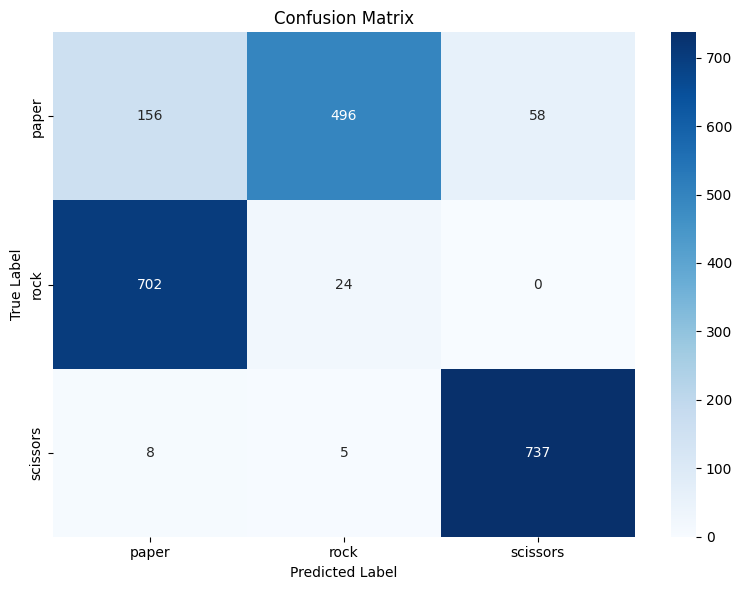

Evaluation Complete!


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import tensorflow as tf


model = tf.keras.models.load_model('/content/drive/MyDrive/rps_model.h5')


from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_HEIGHT = 128
IMG_WIDTH = 128
BATCH_SIZE = 16
DATASET_PATH = '/content/drive/MyDrive/rps-datset--'

test_datagen = ImageDataGenerator(rescale=1./255)

test_gen = test_datagen.flow_from_directory(
    DATASET_PATH,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)


print(" Evaluating model on test data...\n")

predictions = model.predict(test_gen)
true_labels = test_gen.classes
predicted_labels = np.argmax(predictions, axis=1)

class_names = list(test_gen.class_indices.keys())
print(f"Classes: {class_names}\n")


accuracy = np.mean(predicted_labels == true_labels)
print(f"Overall Accuracy: {accuracy*100:.2f}%\n")


print("Classification Report:")
print(classification_report(true_labels, predicted_labels, target_names=class_names))


cm = confusion_matrix(true_labels, predicted_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

print("Evaluation Complete!")

🎮 Rock Paper Scissors Game Started!
📷 Capturing image from webcam...



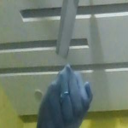

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step

 Your Choice: ROCK
 Confidence: 41.86%

 Computer Choice: SCISSORS

 Result: You Win! 🎉

Model Predictions:
  Paper: 36.42%
  Rock: 41.86%
  Scissors: 21.72%


In [13]:
import tensorflow as tf
import numpy as np
from PIL import Image
import io
import base64

# Load the trained model
model = tf.keras.models.load_model('/content/drive/MyDrive/rps_model.h5')

IMG_HEIGHT = 128  # Match your training size
IMG_WIDTH = 128

class_names = ['paper', 'rock', 'scissors']

# Game logic
def get_computer_choice():
    return np.random.choice(class_names)

def determine_winner(user_choice, computer_choice):
    if user_choice == computer_choice:
        return "Draw! 🤝"

    if user_choice == 'rock':
        return "You Win! 🎉" if computer_choice == 'scissors' else "Computer Wins! 🤖"
    elif user_choice == 'paper':
        return "You Win! 🎉" if computer_choice == 'rock' else "Computer Wins! 🤖"
    elif user_choice == 'scissors':
        return "You Win! 🎉" if computer_choice == 'paper' else "Computer Wins! 🤖"

print("🎮 Rock Paper Scissors Game Started!")
print("📷 Capturing image from webcam...\n")

# Capture image from webcam
from google.colab.output import eval_js
from google.colab.patches import cv2_imshow

js_code = """
async function takePhoto(quality) {
  const div = document.createElement('div');
  const capture = document.createElement('canvas');
  const video = document.createElement('video');
  video.setAttribute('autoplay', '');
  video.setAttribute('playsinline', '');

  const stream = await navigator.mediaDevices.getUserMedia({video: true});
  video.srcObject = stream;

  await new Promise(r => video.onloadedmetadata = r);
  const [w,h] = [video.videoWidth, video.videoHeight];
  capture.getContext('2d').drawImage(video, 0, 0, w, h);
  stream.getTracks().forEach(track => track.stop());

  return capture.toDataURL('image/jpeg', quality);
}
takePhoto(0.8);
"""

image_data = eval_js(js_code)
image_data = image_data.split(',')[1]
image_bytes = base64.b64decode(image_data)
image = Image.open(io.BytesIO(image_bytes))

# Resize image
image_resized = image.resize((IMG_HEIGHT, IMG_WIDTH))

# Display captured image
cv2_imshow(np.array(image_resized))

# Predict
image_array = np.array(image_resized) / 255.0
image_array = np.expand_dims(image_array, axis=0)

prediction = model.predict(image_array)
user_choice_idx = np.argmax(prediction)
user_choice = class_names[user_choice_idx]
confidence = prediction[0][user_choice_idx]

print(f"\n Your Choice: {user_choice.upper()}")
print(f" Confidence: {confidence*100:.2f}%\n")

# Game result
computer_choice = get_computer_choice()
print(f" Computer Choice: {computer_choice.upper()}\n")

result = determine_winner(user_choice, computer_choice)
print(f" Result: {result}\n")

print("Model Predictions:")
for i, class_name in enumerate(class_names):
    print(f"  {class_name.capitalize()}: {prediction[0][i]*100:.2f}%")